# Analysis of Exactly How Lazy I Am

Data is a CSV titled _clocktime.csv_ 

## Data Dictionary

---

| Data Point | Definition                     |
|:---------- |:------------------------------ |
| date       | The date of the record         |
| Lhour      | Hours of productive time       |
| Lmin       | Minutes of productive time     |
| Lsec       | Seconds of productive time     |
| Rhour      | Hours of Non-productive time   |
| Rmin       | Minutes of Non-productive time |
| Rsec       | Seconds of Non-productive time |

---

| Productive Time | Non-Productive Time |
| --------------- | ------------------- |
| Working         | Procrastinating     |
| Studying        | Off-Task            |
| On-Task         | Leisure Time        |

---

## Import Necesaary Packages

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime

## Begin Data Import and Munging


`date` is stored as a string and needs to be parsed for a time series
All other fields need to be converted to seconds for aggregation and proportion comparison

In [14]:
# Import the data into a data frame with pandas
df = pd.read_csv('clocktime.csv')

In [16]:
# Preview of our data
df.head(10)
df.tail()

,date,Lhour,Lmin,Lsec,Rhour,Rmin,Rsec
33,12/5/20,0,54,45,1,52,7
34,12/8/20,5,53,20,9,59,59
35,12/9/20,0,0,0,2,39,36
36,12/9/20,1,42,7,12,30,35
37,12/10/20,0,0,0,5,54,31


In [4]:
# Get info about the data frame fields
# This is a method so parens are needed
# Object types are usually strings
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38 entries, 0 to 37
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   date    38 non-null     object
 1   Lhour   38 non-null     int64 
 2   Lmin    38 non-null     int64 
 3   Lsec    38 non-null     int64 
 4   Rhour   38 non-null     int64 
 5   Rmin    38 non-null     int64 
 6   Rsec    38 non-null     int64 
dtypes: int64(6), object(1)
memory usage: 2.2+ KB


In [5]:
# Make 'date' into a datetime instead of a string
df["date"] = pd.to_datetime(df["date"])

# Convert Hours and Minutes to seconds for comparison
leftTimes = (df["Lsec"],df["Lmin"] * 60, df["Lhour"] * 3600)
rightTimes = (df["Rsec"],df["Rmin"] * 60, df["Rhour"] * 3600)

df["Lsec"] = sum(leftTimes)
df["Rsec"] = sum(rightTimes)

total = (df["Lsec"], df["Rsec"])
df["total"] = sum(total)

In [6]:
# Overwrite data frame
df = df[['date','Lsec','Rsec','total']]

In [7]:
# Get a proportion percentage data points for comparison
df['Lpct'] = round(df['Lsec'] / df['total'] * 100, 0)
df['Rpct'] = round(df['Rsec'] / df['total'] * 100, 0)

## Begin Data Visualization

This utilizes the `matplotlib.pyplot` module

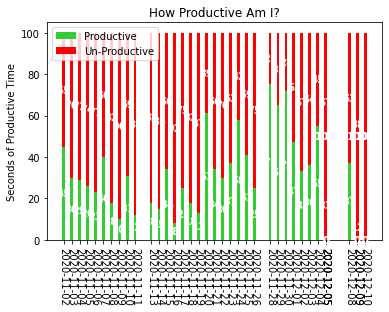

<AxesSubplot:>

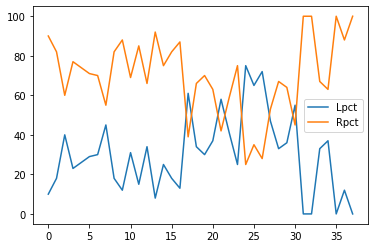

In [8]:
ind = df['date']    # the x locations for the groups
width = 0.35       # the width of the bars: can also be len(x) sequence

p1 = plt.bar(ind, df['Lpct'], width, color = 'limegreen')
p2 = plt.bar(ind, df['Rpct'], width, color = 'red', bottom=df['Lpct'])

plt.ylabel('Seconds of Productive Time')
plt.title('How Productive Am I?')
plt.xticks(ind, rotation=270)
plt.legend((p1[0], p2[0]), ('Productive', 'Un-Productive'), loc = "best")

# Data Labels for stacked bar
for r1, r2 in zip(p1, p2):
    h1 = r1.get_height()
    h2 = r2.get_height()
    plt.text(r1.get_x() + r1.get_width() / 2., h1 / 2., "%d" % h1, ha="center", va="center", color="white", fontsize=10, fontweight="bold")
    plt.text(r2.get_x() + r2.get_width() / 2., h1 + h2 / 2., "%d" % h2, ha="center", va="center", color="white", fontsize=10, fontweight="bold")


plt.show()

# Line Chart
df[['Lpct','Rpct']].plot()

In [18]:
df.isin(['12/8/20'])

,date,Lhour,Lmin,Lsec,Rhour,Rmin,Rsec
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False
6,False,False,False,False,False,False,False
7,False,False,False,False,False,False,False
8,False,False,False,False,False,False,False
9,False,False,False,False,False,False,False


In [53]:
today = datetime.today().strftime('%m-%d-%y')
if today in df.values:
    print("yes!")
row = df[df['date'] == '12/8/20'].index[0]
df.loc[row,'Lhour'] = 10
df.to_csv('test.csv', index=False)

In [48]:
if df.loc[row, 'Rsec'] > 50:
    print('test')

test


In [59]:
df.loc[row, 'Lsec'] = df.loc[row, 'Lsec']//10

In [60]:
df.loc[row, 'Lsec']

2

In [62]:
if today not in df.values:
    print('correct')

correct
